<a href="https://colab.research.google.com/github/JuliaZanevych/HW_for_DataTalks.Club/blob/main/homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA
1. Load the data.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"
data = pd.read_csv(url)


2. Look at the median_house_value variable. Does it have a long tail?

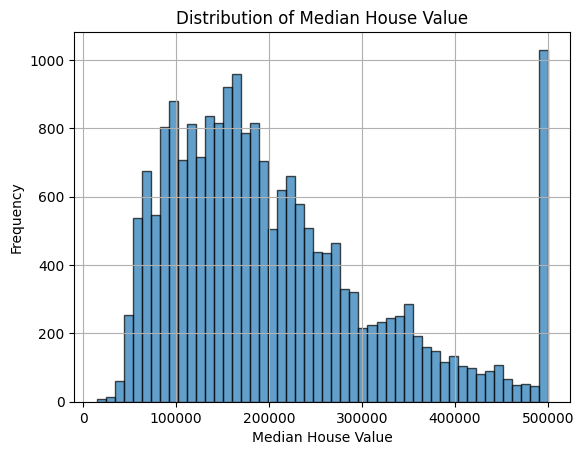

In [2]:
import matplotlib.pyplot as plt

data['median_house_value'].hist(bins=50, edgecolor='k', alpha=0.7)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()


# Preparing the dataset

1. Keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND':

In [3]:
filtered_data = data[data['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]


2. Use only the specified columns:

In [4]:
selected_columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

final_data = filtered_data[selected_columns]


# Question 1

There's one feature with missing values. What is it?

    total_rooms
    total_bedrooms
    population
    households

In [5]:
missing_values = final_data.isnull().sum()
feature_with_missing_values = missing_values[missing_values > 0].index[0]
print(feature_with_missing_values)


total_bedrooms


# Question 2

What's the median (50% percentile) for variable 'population'?

    995
    1095
    1195
    1295


In [6]:
population_median = final_data['population'].median()
print(population_median)


1195.0


# Prepare and split the dataset

    Shuffle the dataset (the filtered one you created above), use seed 42.
    Split your data in train/val/test sets, with 60%/20%/20% distribution.
    Apply the log transformation to the median_house_value variable using the np.log1p() function.


1. Shuffle the dataset

In [7]:
shuffled_data = final_data.sample(frac=1, random_state=42)


2. Split your data into train/val/test sets

In [8]:
train_size = int(0.6 * len(shuffled_data))
val_size = int(0.2 * len(shuffled_data))

train_data = shuffled_data[:train_size]
val_data = shuffled_data[train_size:train_size+val_size]
test_data = shuffled_data[train_size+val_size:]


3. Apply the log transformation to the median_house_value variable

In [9]:
import numpy as np

train_data['median_house_value'] = np.log1p(train_data['median_house_value'])
val_data['median_house_value'] = np.log1p(val_data['median_house_value'])
test_data['median_house_value'] = np.log1p(test_data['median_house_value'])


<ipython-input-9-5134068a5809>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['median_house_value'] = np.log1p(train_data['median_house_value'])
<ipython-input-9-5134068a5809>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['median_house_value'] = np.log1p(val_data['median_house_value'])
<ipython-input-9-5134068a5809>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

# Question 3

    We need to deal with missing values for the column from Q1.
    We have two options: fill it with 0 or with the mean of this variable.
    Try both options. For each, train a linear regression model without regularization using the code from the lessons.
    For computing the mean, use the training only!
    Use the validation dataset to evaluate the models and compare the RMSE of each option.
    Round the RMSE scores to 2 decimal digits using round(score, 2)
    Which option gives better RMSE?

Options:

    With 0
    With mean
    Both are equally good


Alright, let's walk through the process step by step.

    Identify the column with missing values (from Q1, we identified it as total_bedrooms).

    Fill the missing values with either 0 or the mean of the column from the training set.

    Train a linear regression model for each case.

    Evaluate the models on the validation dataset and compare the RMSE.

## 1. Preparation: Extracting Features and Target

In [10]:
def extract_features_and_target(df):
    X = df.drop(columns=['median_house_value'])
    y = df['median_house_value']
    return X, y

X_train, y_train = extract_features_and_target(train_data)
X_val, y_val = extract_features_and_target(val_data)


## 2. Option 1: Filling with 0

In [11]:
X_train_0 = X_train.copy()
X_val_0 = X_val.copy()

X_train_0['total_bedrooms'].fillna(0, inplace=True)
X_val_0['total_bedrooms'].fillna(0, inplace=True)


## 3. Option 2: Filling with mean

In [12]:
mean_total_bedrooms = X_train['total_bedrooms'].mean()

X_train_mean = X_train.copy()
X_val_mean = X_val.copy()

X_train_mean['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)
X_val_mean['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)


## 4. Training Linear Regression Models

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Model for option 1
model_0 = LinearRegression()
model_0.fit(X_train_0, y_train)
y_pred_0 = model_0.predict(X_val_0)
rmse_0 = mean_squared_error(y_val, y_pred_0, squared=False)
print(f"RMSE (0 filling): {round(rmse_0, 2)}")

# Model for option 2
model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train)
y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = mean_squared_error(y_val, y_pred_mean, squared=False)
print(f"RMSE (mean filling): {round(rmse_mean, 2)}")


RMSE (0 filling): 0.34
RMSE (mean filling): 0.34


# Question 4

    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to 2 decimal digits.
    Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

    0
    0.000001
    0.001
    0.0001


We'll be using Ridge regression from scikit-learn as it allows us to set a regularization parameter αα which is equivalent to rr in the context of this question.

Let's walk through the process:

    Fill the NAs with 0 for both training and validation data.
    Train Ridge regression models with different values of rr or αα.
    Evaluate each model using RMSE on the validation dataset.
    Identify the rr that gives the best RMSE.

In [14]:
from sklearn.linear_model import Ridge

X_train_0 = X_train.copy()
X_val_0 = X_val.copy()

X_train_0['total_bedrooms'].fillna(0, inplace=True)
X_val_0['total_bedrooms'].fillna(0, inplace=True)

alphas = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmse_scores = {}

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_0, y_train)
    y_pred = model.predict(X_val_0)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    rmse_scores[alpha] = round(rmse, 2)

best_alpha = min(rmse_scores, key=rmse_scores.get)
print(f"Best r (alpha) value is: {best_alpha} with RMSE: {rmse_scores[best_alpha]}")


Best r (alpha) value is: 0 with RMSE: 0.34


# Question 5

    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))

What's the value of std?

    0.5
    0.05
    0.005
    0.0005

    Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.


Steps:

    Use each seed value to shuffle and split the dataset.
    Fill the missing values with 0.
    Train a linear regression model without regularization.
    Evaluate the model on the validation dataset to obtain RMSE.
    Collect all RMSE scores.
    Compute the standard deviation of all RMSE scores.

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming final_data is your dataframe with filtered records and required columns
# Create a list to collect the RMSE for each seed
rmse_scores = []

# Loop over each seed value
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # Shuffle the data with the current seed
    shuffled_data = final_data.sample(frac=1, random_state=seed)

    # Split the data into train/val/test
    train_size = int(0.6 * len(shuffled_data))
    val_size = int(0.2 * len(shuffled_data))

    train_data = shuffled_data.iloc[:train_size]
    val_data = shuffled_data.iloc[train_size:train_size+val_size]

    # Extract features and target variable for training and validation data
    X_train, y_train = train_data.drop(columns=['median_house_value']), train_data['median_house_value']
    X_val, y_val = val_data.drop(columns=['median_house_value']), val_data['median_house_value']

    # Fill missing values in 'total_bedrooms' column with 0
    X_train['total_bedrooms'].fillna(0, inplace=True)
    X_val['total_bedrooms'].fillna(0, inplace=True)

    # Train a linear regression model
    model = LinearRegression().fit(X_train, y_train)

    # Predict on validation data and compute RMSE
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    rmse_scores.append(rmse)

# Compute the standard deviation of RMSE scores
std_value = np.std(rmse_scores)

print(round(std_value, 3))
print(rmse_scores)



1336.197
[63860.234213162155, 64737.80152590399, 65920.89834381797, 65358.555115388626, 66263.8822340656, 67852.54756435638, 65480.256829654376, 67839.99163549505, 67803.01235127586, 65072.51036332185]


# Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?

Options:

    0.13
    0.23
    0.33
    0.43


In [18]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Assuming final_data is your dataframe with filtered records and required columns

# Shuffle the data with seed 9
shuffled_data = final_data.sample(frac=1, random_state=9)

# Split the data into train/val/test
train_size = int(0.6 * len(shuffled_data))
val_size = int(0.2 * len(shuffled_data))

train_data = shuffled_data.iloc[:train_size]
val_data = shuffled_data.iloc[train_size:train_size+val_size]
test_data = shuffled_data.iloc[train_size+val_size:]

# Combine train and validation data
train_data = pd.concat([train_data, val_data])

# Extract features and target variable for training and testing data
X_train, y_train = train_data.drop(columns=['median_house_value']), train_data['median_house_value']
X_test, y_test = test_data.drop(columns=['median_house_value']), test_data['median_house_value']

# Fill missing values in 'total_bedrooms' column with 0
X_train['total_bedrooms'].fillna(0, inplace=True)
X_test['total_bedrooms'].fillna(0, inplace=True)

# Train a regularized linear regression model with r=0.001
model = Ridge(alpha=0.001).fit(X_train, y_train)

# Predict on test data and compute RMSE
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(round(rmse, 2))


66703.69
